In [14]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition', 'us-west-2')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

#only run this once or you will freeze and have to restart the notebook server
#to get this working properly, you'll need to change the 'conn = ' line in mxnet_mtcnn_face_detection
#from mxnet_mtcnn_face_detection.main_rekognition_filter import getdetector
#from mxnet_mtcnn_face_detection.main_rekognition_filter import countfaces
#change this to the location of your model folder
#detector=getdetector('mxnet_mtcnn_face_detection/model')

print ('done')

done


In [15]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='mybucketjaykumar1234'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
print info about this bucket
<Bucket: mybucketjaykumar1234>
0.003 GB
num files: 32
Cano1.png	12302	2017-09-19T02:47:37.000Z
allan.png	38362	2017-09-19T02:11:01.000Z
beachpic.png	92369	2017-09-19T02:47:37.000Z
bill.png	44413	2017-09-19T02:11:02.000Z
canoandcruz.png	102642	2017-09-19T02:47:37.000Z
canoandjayz.png	50004	2017-09-19T02:47:38.000Z
canoandreyes.png	81886	2017-09-19T02:47:38.000Z
cat_picture.png	113078	2017-09-19T02:47:38.000Z
cruz.png	18921	2017-09-19T02:47:37.000Z
dog_pic.png	56996	2017-09-19T02:47:37.000Z
elon.png	38896	2017-09-19T02:11:02.000Z
embiidandokafor.png	94450	2017-09-19T02:47:37.000Z
embiidandsimmons.png	161768	2017-09-19T02:47:37.000Z
finalized_model.sav	2149	2017-09-11T03:11:54.000Z
foursixers.png	77603	2017-09-19T02:47:38.000Z
hinkie.png	163536	2017-09-19T02:47:37.000Z
hinkieandbrown.png	48090	2017-09-19T02:47:37.000Z
hinkieandnoel.png	316380	2017-09-19T02:47:37.000Z
hinkieandsaric.png	228041	2017-09-19T02:47:37.000Z
hinkiembiid.png	101365	2017-09-19T02:47:3

In [25]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
#import commands
count=0
failcount=0

correctAPICall=0
incorrectAPICall=0
correctHold=0
incorrectHold=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.recognize_celebrities(
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
                #,'Version': '1'
            }
        }
        )
        
        #version 1: get ground truth from rekognition api
        num_api_faces=len(response['CelebrityFaces'])
        print('Rekognition faces detected count: '+str(num_api_faces))
        
     #version 1: get ground truth from rekognition api
        num_api_name=response['CelebrityFaces']
        print('Rekognition faces detected count: '+str(num_api_name))

        
        #keep track of success/fail ratio
        
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
        



Cano1.png
Rekognition faces detected count: 1
Rekognition faces detected count: [{'Urls': [], 'Name': 'Robinson Canó', 'Id': '2YH2cK', 'Face': {'BoundingBox': {'Width': 0.5046153664588928, 'Height': 0.5046153664588928, 'Left': 0.22769230604171753, 'Top': 0.2769230902194977}, 'Confidence': 99.99897003173828, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.3862181007862091, 'Y': 0.4175967574119568}, {'Type': 'eyeRight', 'X': 0.5988452434539795, 'Y': 0.4280403256416321}, {'Type': 'nose', 'X': 0.4908793270587921, 'Y': 0.5439277291297913}, {'Type': 'mouthLeft', 'X': 0.3790460526943207, 'Y': 0.617712140083313}, {'Type': 'mouthRight', 'X': 0.586789071559906, 'Y': 0.6329509615898132}], 'Pose': {'Roll': 2.4364678859710693, 'Yaw': 3.3240747451782227, 'Pitch': -0.7981278300285339}, 'Quality': {'Brightness': 40.87970733642578, 'Sharpness': 99.97486114501953}}, 'MatchConfidence': 98.0}]
allan.png
Rekognition faces detected count: 3
Rekognition faces detected count: [{'Urls': ['www.imdb.com/name/nm0837377'

embiidandsimmons.png


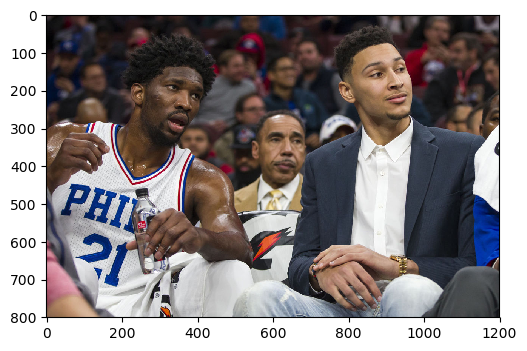

In [17]:
#retrieve and print a selected image
image='embiidandsimmons.png'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/MTCNN-face-filter'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))